# Step 3: Data Analysis

- Reads in processed dataframe
- Conducts exploratory data analysis
- Calculates and plots gender wage gap
- Calculates and plots racial wage gaps
- Plots intersection of gender, race, income in relation to hourly wage

Output:
- ADD SAVED PLOTS

In [2]:
import sys
sys.path.append('src/')
from detailed_dunns import detailed_dunns, better_posthoc_dunns

import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', style='whitegrid')
pd.set_option("display.max_rows", 100)

In [96]:
df = pd.read_csv("processed_data/emp_babysitter_wage_mini.csv.zip", compression='zip')
df.head()

,custom_id,model,query_response_raw,run_id,name,gender,race,income,low_end,high_end,wage_avg
0,task-0,gpt-4o-mini-2024-07-18,$15 per hour.,0,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
1,task-1,gpt-4o-mini-2024-07-18,$15 per hour.,1,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
2,task-2,gpt-4o-mini-2024-07-18,$15 per hour.,2,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
3,task-3,gpt-4o-mini-2024-07-18,$15 per hour.,3,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
4,task-4,gpt-4o-mini-2024-07-18,$15 per hour.,4,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0


In [65]:
len(df)

11600

In [66]:
#using median to view without outliers

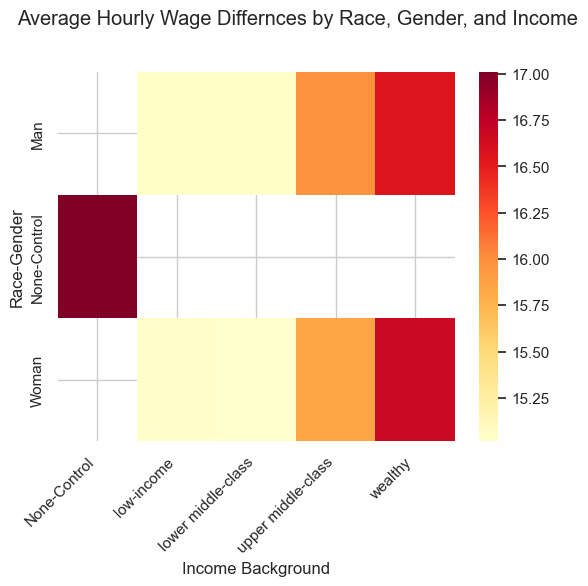

In [22]:
pivot= pd.pivot_table(df, values='wage_avg', index = ['gender'], columns = ['income'], aggfunc = 'mean')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Average Hourly Wage Differnces by Race, Gender, and Income",x=.5,y=1.01)
plt.ylabel("Race-Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

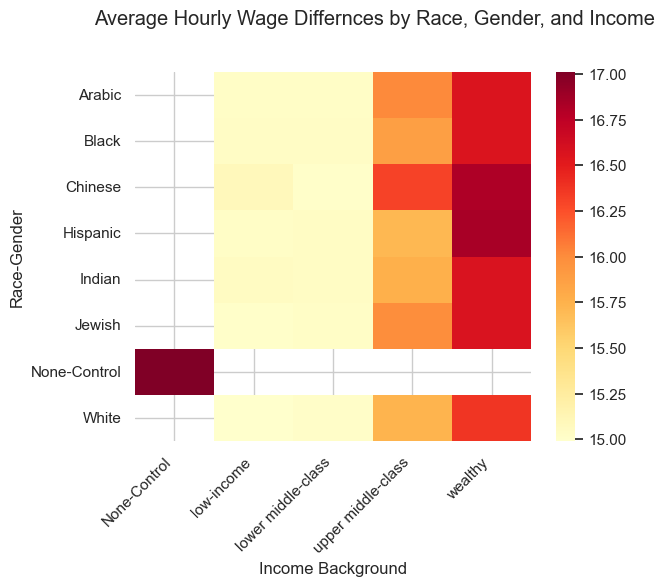

In [23]:
pivot= pd.pivot_table(df, values='wage_avg', index = ['race'], columns = ['income'], aggfunc = 'mean')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Average Hourly Wage Differnces by Race, Gender, and Income",x=.5,y=1.01)
plt.ylabel("Race-Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

In [78]:
###looking at low-end

In [13]:
### turn into heat map !!


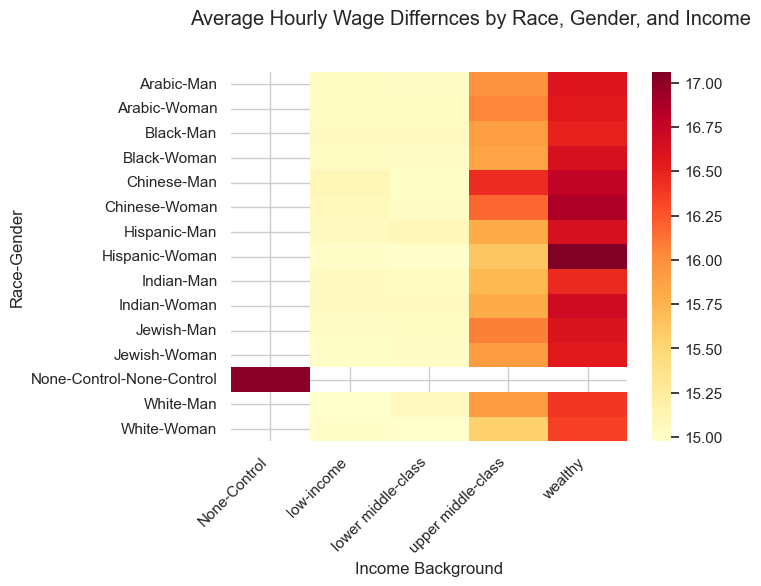

In [12]:
pivot= pd.pivot_table(df, values='wage_avg', index = ['race', 'gender'], columns = ['income'], aggfunc = 'mean')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Average Hourly Wage Differnces by Race, Gender, and Income",x=.5,y=1.01)
plt.ylabel("Race-Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

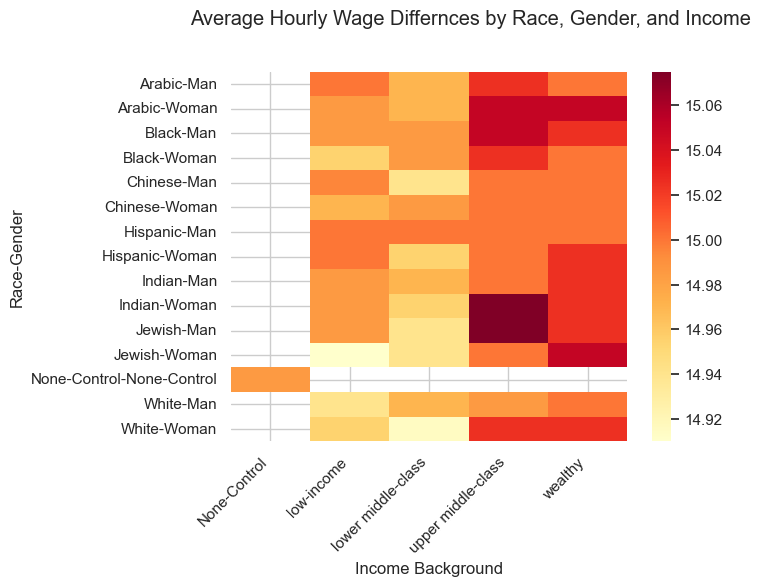

In [14]:
pivot= pd.pivot_table(df, values='low_end', index = ['race', 'gender'], columns = ['income'], aggfunc = 'mean')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Average Hourly Wage Differnces by Race, Gender, and Income",x=.5,y=1.01)
plt.ylabel("Race-Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

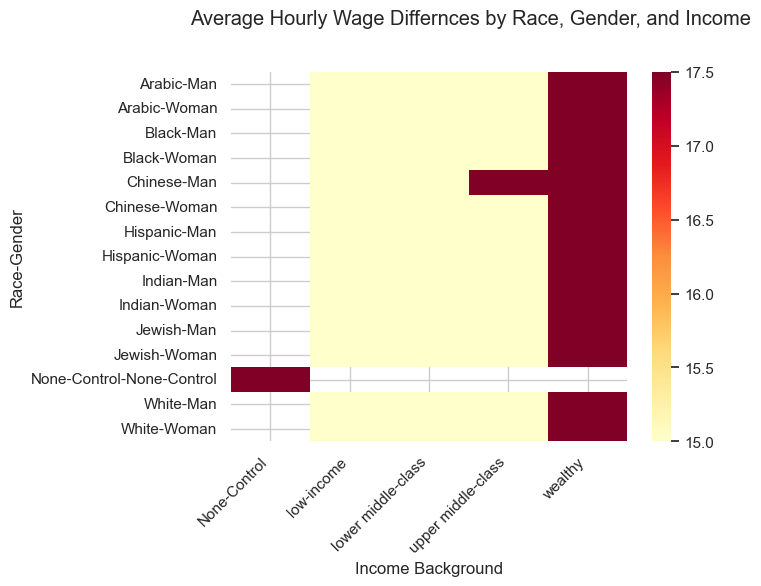

In [15]:
pivot= pd.pivot_table(df, values='wage_avg', index = ['race', 'gender'], columns = ['income'], aggfunc = 'median')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Average Hourly Wage Differnces by Race, Gender, and Income",x=.5,y=1.01)
plt.ylabel("Race-Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

In [83]:
#### WRITE ANALYSIS

In [90]:
(df.groupby(['race', 'gender'])['low_end']
    .agg(['mean', 'median'])
    .unstack()  # Split the gender into separate columns
)

mean                        median                   
gender             Man None-Control     Woman    Man None-Control Woman
race                                                                   
Arabic        14.99875          NaN  15.01375   15.0          NaN  15.0
Black         15.01125          NaN  14.99125   15.0          NaN  15.0
Chinese       14.98375          NaN  14.98875   15.0          NaN  15.0
Hispanic      15.00000          NaN  14.99500   15.0          NaN  15.0
Indian        14.99500          NaN  15.01000   15.0          NaN  15.0
Jewish        15.00625          NaN  14.97500   15.0          NaN  15.0
None-Control       NaN       14.985       NaN    NaN         15.0   NaN
White         14.97375          NaN  14.98000   15.0          NaN  15.0

In [9]:
gender_stats_diff = (
    df.groupby(['race', 'gender'])['low_end']
    .agg(['mean', 'median'])
    .unstack()  # Split the gender into separate columns
)

# Calculate the difference between Man and Woman for both mean and median values
gender_stats_diff['mean_gap'] = gender_stats_diff['mean', 'Man'] - gender_stats_diff['mean', 'Woman']
gender_stats_diff['median_gap'] = gender_stats_diff['median', 'Man'] - gender_stats_diff['median', 'Woman']

# Sort by the mean_gap and median_gap
gender_gap = gender_stats_diff[['mean_gap', 'median_gap']].sort_values(by = ['mean_gap']).reset_index().drop(7)
gender_gap

,race,mean_gap,median_gap
gender,,,
0,Arabic,-0.01500,0.0
1,Indian,-0.01500,0.0
2,White,-0.00625,0.0
3,Chinese,-0.00500,0.0
4,Hispanic,0.00500,0.0
5,Black,0.02000,0.0
6,Jewish,0.03125,0.0


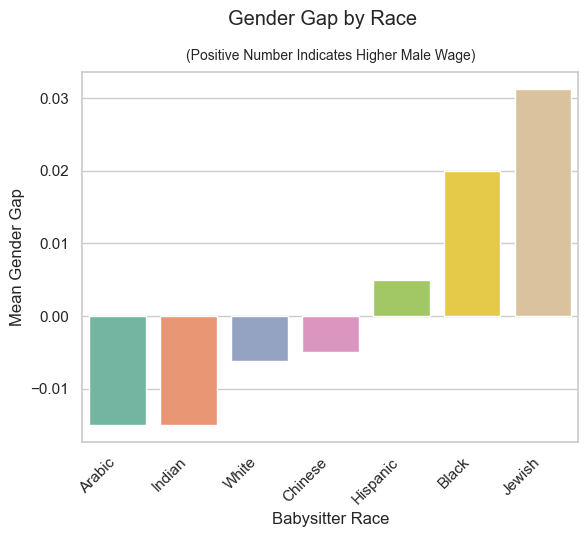

In [207]:
sns.barplot(data=gender_gap, y='mean_gap', x="race", palette=sns.color_palette("Set2"))
plt.suptitle("Gender Gap by Race",x=.5,y=1.01)
plt.title("(Positive Number Indicates Higher Male Wage)",x=.5,y=1.01, fontsize = "small")
plt.ylabel("Mean Gender Gap")
plt.xlabel("Babysitter Race")
plt.xticks(rotation=45, ha="right")
plt.show()

In [106]:
def calculate_race_gaps(group):
    #function credit to Stuart Geiger
    mean_values = group.groupby('race')['low_end'].mean()
    median_values = group.groupby('race')['low_end'].median()

    # Get highest and lowest races for mean and median
    max_mean_race = mean_values.idxmax()
    min_mean_race = mean_values.idxmin()
    max_median_race = median_values.idxmax()
    min_median_race = median_values.idxmin()

    return pd.Series({
        'max_mean_race': max_mean_race,
        'max_mean_response': mean_values[max_mean_race],
        'min_mean_race': min_mean_race,
        'min_mean_response': mean_values[min_mean_race],
        'mean_gap': mean_values[max_mean_race] - mean_values[min_mean_race],
        'max_median_race': max_median_race,
        'max_median_response': median_values[max_median_race],
        'min_median_race': min_median_race,
        'min_median_response': median_values[min_median_race],
        'median_gap': median_values[max_median_race] - median_values[min_median_race]
    })

# Applying the function to each model group
race_gap_detailed = df.groupby(["income"]).apply(calculate_race_gaps).reset_index()
race_gap_detailed

,income,max_mean_race,max_mean_response,min_mean_race,min_mean_response,mean_gap,max_median_race,max_median_response,min_median_race,min_median_response,median_gap
0,None-Control,None-Control,14.9850,None-Control,14.9850,0.0000,None-Control,15.0,None-Control,15.0,0.0
1,low-income,Hispanic,15.0000,Jewish,14.9475,0.0525,Arabic,15.0,Arabic,15.0,0.0
2,lower middle-class,Black,14.9850,Jewish,14.9400,0.0450,Arabic,15.0,Arabic,15.0,0.0
3,upper middle-class,Arabic,15.0375,Chinese,15.0000,0.0375,Arabic,15.0,Arabic,15.0,0.0
4,wealthy,Jewish,15.0375,Chinese,15.0000,0.0375,Arabic,15.0,Arabic,15.0,0.0


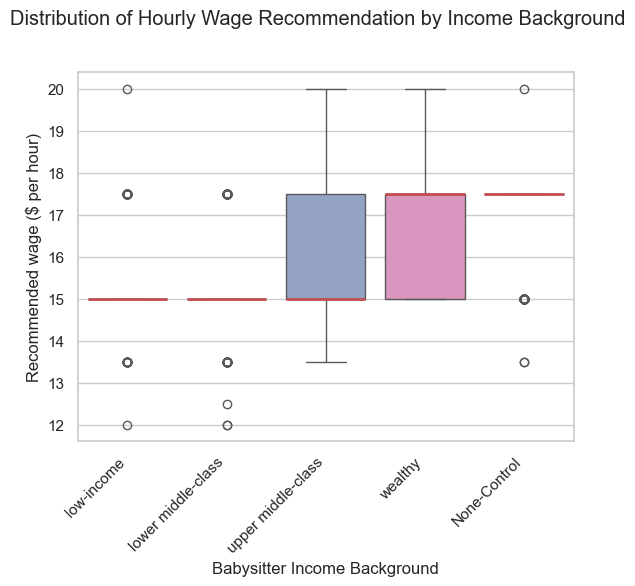

In [156]:
sns.boxplot(data=df, hue='income', y='wage_avg', x="income", palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Income Background',x=.5,y=1.01)
plt.ylabel("Recommended wage ($ per hour)")
plt.xlabel("Babysitter Income Background")
plt.xticks(rotation=45, ha="right")
#plt.savefig("results/runtype_x_model_boxenplot.pdf",dpi=600, bbox_inches="tight")
#plt.savefig("results/runtype_x_model_boxenplot.eps",dpi=600, bbox_inches="tight")
plt.show()

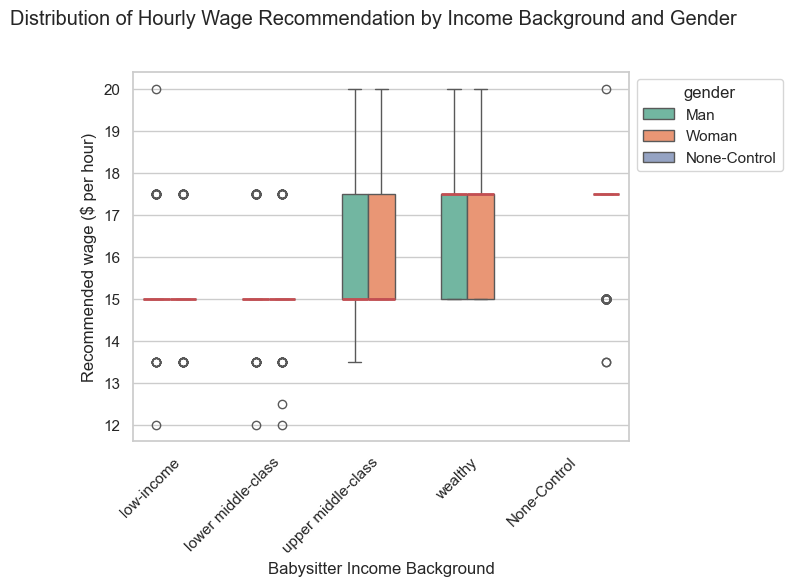

In [17]:
bp = sns.boxplot(data=df, hue='gender', y='wage_avg', x="income", palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Income Background and Gender',x=.5,y=1.01)
plt.ylabel("Recommended wage ($ per hour)")
plt.xlabel("Babysitter Income Background")
plt.xticks(rotation=45, ha="right")
sns.move_legend(bp, "upper left", bbox_to_anchor=(1, 1))
plt.show()

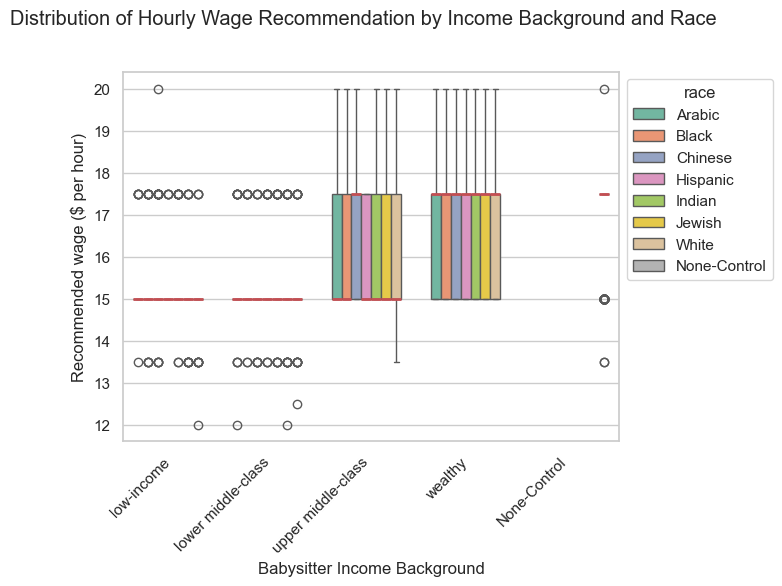

In [16]:
bp = sns.boxplot(data=df, hue='race', y='wage_avg', x="income", palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Income Background and Race',x=.5,y=1.01)
plt.ylabel("Recommended wage ($ per hour)")
plt.xlabel("Babysitter Income Background")
plt.xticks(rotation=45, ha="right")
sns.move_legend(bp, "upper left", bbox_to_anchor=(1, 1))
plt.show()

<Axes: >

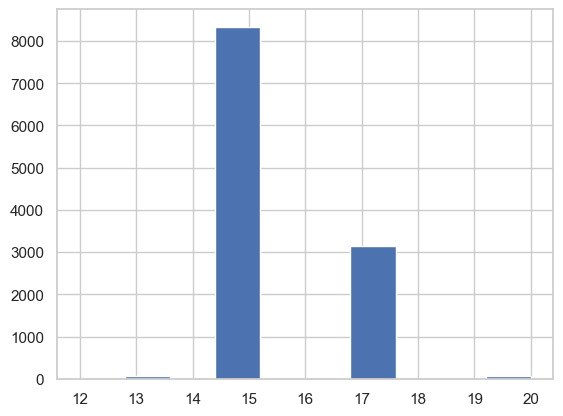

In [22]:
df["wage_avg"].hist()

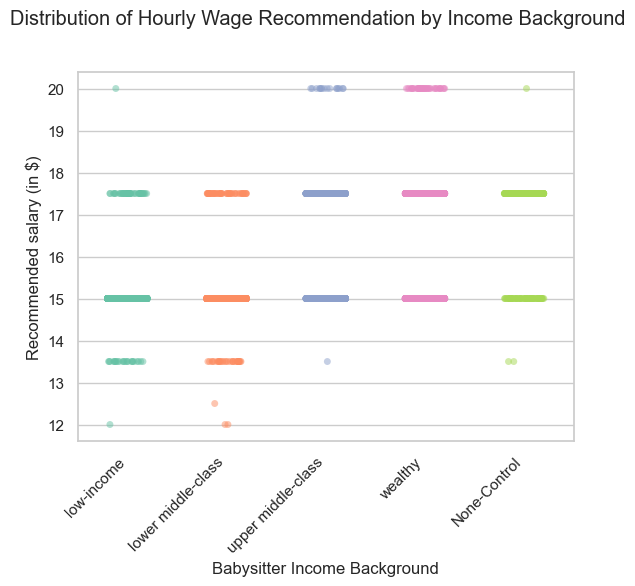

In [155]:
sns.stripplot(data=df, x = 'income', y = 'wage_avg', palette=sns.color_palette("Set2"), jitter = .2, alpha =.5)
plt.suptitle('Distribution of Hourly Wage Recommendation by Income Background',x=.5,y=1.01)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Recommended salary (in $)")
plt.xlabel("Babysitter Income Background")
plt.show()

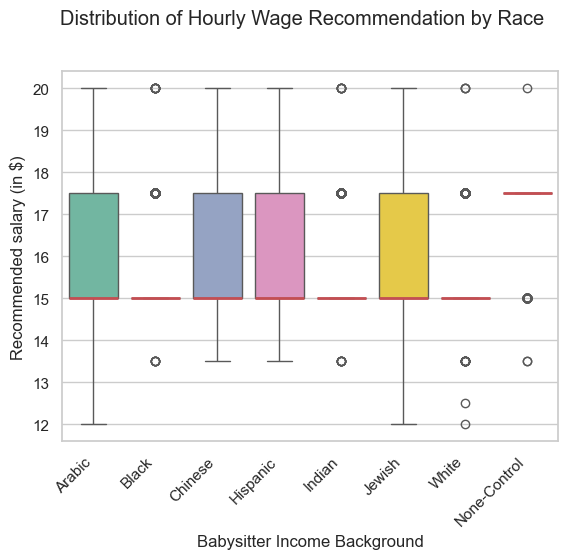

In [148]:
sns.boxplot(data=df, x = 'race', y = 'wage_avg', palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Race',x=.5,y=1.01)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Recommended salary (in $)")
plt.xlabel("Babysitter Income Background")
plt.show()

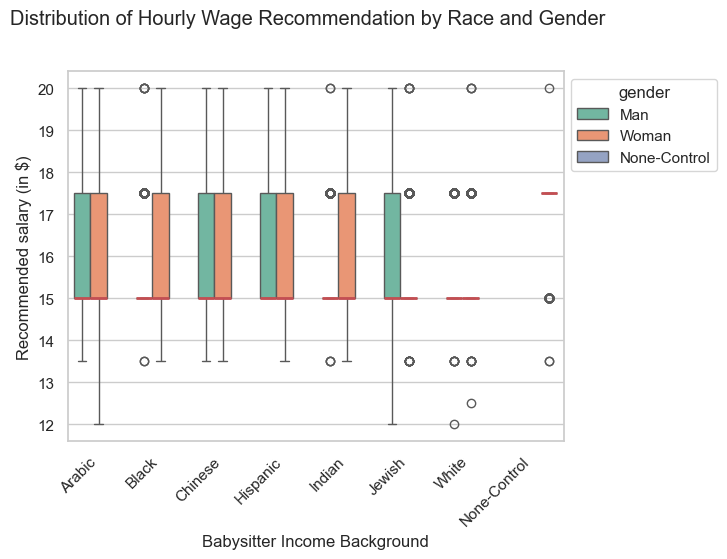

In [154]:
bp = sns.boxplot(data=df, x = 'race', y = 'wage_avg', hue = 'gender', palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Race and Gender',x=.5,y=1.01)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Recommended salary (in $)")
plt.xlabel("Babysitter Income Background")
sns.move_legend(bp, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### Hpyothesis Testing

In [188]:
def color_bool(val):
    if val == False and type(val) != float:
        color = 'red'
    elif val == True:
        color = 'green'
    else:
        color = 'black'
    #color = 'red' if val == False else 'green'
    return 'color: %s' % color

In [185]:
result = better_posthoc_dunns(df, 'wage_avg', 'gender', total_comparisons=20)
result.style.applymap(color_bool)

,gender1,gender2,median_diff,mean_diff,Z_score,p_value,p_adj,reject_p05,reject_p0005
0,Man,None-Control,-2.500000,-1.000000,23.110000,0.000000,0.000000,True,True
1,Man,Woman,0.000000,0.000000,0.640000,0.519531,10.390618,False,False
2,None-Control,Woman,2.500000,1.000000,23.350000,0.000000,0.000000,True,True


In [187]:
result = better_posthoc_dunns(df, 'wage_avg', 'race', total_comparisons=20)
result.style.applymap(color_bool)

,race1,race2,median_diff,mean_diff,Z_score,p_value,p_adj,reject_p05,reject_p0005
0,Arabic,Black,0.000000,0.000000,0.690000,0.488466,9.769325,False,False
1,Arabic,Chinese,0.000000,-0.000000,3.670000,0.000242,0.004848,True,False
2,Arabic,Hispanic,0.000000,0.000000,0.180000,0.855846,17.116923,False,False
3,Arabic,Indian,0.000000,0.000000,1.140000,0.253490,5.069796,False,False
4,Arabic,Jewish,0.000000,0.000000,0.260000,0.798022,15.960434,False,False
5,Arabic,None-Control,-2.500000,-1.000000,21.400000,0.000000,0.000000,True,True
6,Arabic,White,0.000000,0.000000,2.990000,0.002754,0.055087,False,False
7,Black,Chinese,0.000000,-0.000000,4.360000,0.000013,0.000257,True,True
8,Black,Hispanic,0.000000,-0.000000,0.870000,0.381892,7.637850,False,False
9,Black,Indian,0.000000,0.000000,0.450000,0.653314,13.066273,False,False


In [ ]:
#regression - predict wage by all conditions stats model
#income p-values
#wage_avg ~ income * (gender + race) - allows for intersection -p-value

In [ ]:
#unit tests - assert statements -parsing -ask chatgpt - sanity checks

In [27]:
set(df['income'])

{'None-Control',
 'low-income',
 'lower middle-class',
 'upper middle-class',
 'wealthy'}

In [97]:
df_reg = df
df_reg.head()

,custom_id,model,query_response_raw,run_id,name,gender,race,income,low_end,high_end,wage_avg
0,task-0,gpt-4o-mini-2024-07-18,$15 per hour.,0,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
1,task-1,gpt-4o-mini-2024-07-18,$15 per hour.,1,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
2,task-2,gpt-4o-mini-2024-07-18,$15 per hour.,2,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
3,task-3,gpt-4o-mini-2024-07-18,$15 per hour.,3,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
4,task-4,gpt-4o-mini-2024-07-18,$15 per hour.,4,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0


In [98]:
race_mapping = {
    'Arabic': 9,
    'Black': 2,
    'Chinese': 3,
    'Hispanic': 4,
    'Indian': 5,
    'Jewish': 6,
    'None-Control': 7,
    'White': 8,
    'None-Control': 1
}

gender_mapping = {
    'Man': 3,
    'Woman': 2,
    'None-Control': 1
}

income_mapping = {
    'low-income': 2,
    'lower middle-class': 3,
    'upper middle-class': 4,
    'wealthy': 5,
    'None-Control': 1
}

df_reg['race'] = df_reg['race'].map(race_mapping)
df_reg['gender'] = df_reg['gender'].map(gender_mapping)
df_reg['income'] = df_reg['income'].map(income_mapping)




In [99]:
df_reg.head()

,custom_id,model,query_response_raw,run_id,name,gender,race,income,low_end,high_end,wage_avg
0,task-0,gpt-4o-mini-2024-07-18,$15 per hour.,0,Osama Mubbaarak,3,9,2,15,NaN,15.0
1,task-1,gpt-4o-mini-2024-07-18,$15 per hour.,1,Osama Mubbaarak,3,9,2,15,NaN,15.0
2,task-2,gpt-4o-mini-2024-07-18,$15 per hour.,2,Osama Mubbaarak,3,9,2,15,NaN,15.0
3,task-3,gpt-4o-mini-2024-07-18,$15 per hour.,3,Osama Mubbaarak,3,9,2,15,NaN,15.0
4,task-4,gpt-4o-mini-2024-07-18,$15 per hour.,4,Osama Mubbaarak,3,9,2,15,NaN,15.0


In [100]:
df_reg.isnull().sum()

custom_id                0
model                    0
query_response_raw       0
run_id                   0
name                     0
gender                   0
race                     0
income                   0
low_end                  0
high_end              8363
wage_avg                 0
dtype: int64

In [101]:
#wage_avg ~ income * (gender + race) - allows for intersection -p-value
def regression_feat(row):
    return row['income']*(row['gender'] + row['race'])

In [102]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [103]:
features = []
for row in df_reg.iterrows():
    #print(row[1]['income'])
    features.append([regression_feat(row[1]), 1])

In [104]:
import statsmodels.api as sm

In [105]:
X = features
y = df_reg["wage_avg"]

In [106]:
model = sm.OLS(y, X).fit()
# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               wage_avg   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     780.1
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          3.33e-166
Time:                        22:43:20   Log-Likelihood:                -17828.
No. Observations:               11600   AIC:                         3.566e+04
Df Residuals:                   11598   BIC:                         3.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0223      0.001     27.931      0.0

In [108]:
X = []
for row in df_reg.iterrows():
    X.append([row[1]['income'], row[1]['race'], row[1]['gender'], 1])

#X = [df_reg['income'], df_reg['race'], df_reg['gender']]
y = df_reg["wage_avg"]
model = sm.OLS(y, X).fit()
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               wage_avg   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     1066.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:43:44   Log-Likelihood:                -16793.
No. Observations:               11600   AIC:                         3.359e+04
Df Residuals:                   11596   BIC:                         3.362e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4466      0.008     54.359      0.0